In [1]:
!unzip '/content/drive/MyDrive/Colab Notebooks/encore/csv/archive.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/encore/csv/archive.zip
  inflating: E Commerce Dataset.xlsx  


In [245]:
import pandas as pd

path = '/content/E Commerce Dataset.xlsx'
df_ = pd.read_excel(path, sheet_name=1)
df = df_.copy()
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [246]:
tt = df.isna().sum()
tt[tt>0]

,0
Tenure,264
WarehouseToHome,251
HourSpendOnApp,255
OrderAmountHikeFromlastYear,265
CouponUsed,256
OrderCount,258
DaySinceLastOrder,307


In [244]:
# df의 CustomerID 제거
df = df.drop('CustomerID', axis=1)

In [247]:
import numpy as np

np.random.seed(42)  # 시드 고정
df['Tenure'].fillna(np.random.randint(61,72), inplace=True)
df['WarehouseToHome'].fillna(0, inplace=True)

df = df[df['HourSpendOnApp'].notna()]
df.drop(columns=['OrderAmountHikeFromlastYear'], inplace=True)
df['CouponUsed'].fillna(0, inplace=True)
df['OrderCount'].fillna(0, inplace=True)
df = df[df['DaySinceLastOrder'].notna()]
df = df[~df['DaySinceLastOrder'].isin([31, 46, 30])]

<ipython-input-247-404dd8c414e9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['OrderAmountHikeFromlastYear'], inplace=True)
<ipython-input-247-404dd8c414e9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CouponUsed'].fillna(0, inplace=True)
<ipython-input-247-404dd8c414e9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OrderCount'].fillna(0, inplace=True)


In [248]:
df_.describe(include='all')

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630,5630.000000,5379.000000,5630,5630,5375.000000,5630.000000,5630,5630.000000,5630,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
unique,NaN,NaN,NaN,3,NaN,NaN,7,2,NaN,NaN,6,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Mobile Phone,NaN,NaN,Debit Card,Male,NaN,NaN,Laptop & Accessory,NaN,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,2765,NaN,NaN,2314,3384,NaN,NaN,2050,NaN,2986,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,52815.500000,0.168384,10.189899,NaN,1.654707,15.639896,NaN,NaN,2.931535,3.688988,NaN,3.066785,NaN,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,NaN,0.915389,8.531475,NaN,NaN,0.721926,1.023999,NaN,1.380194,NaN,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,NaN,1.000000,5.000000,NaN,NaN,0.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,NaN,1.000000,9.000000,NaN,NaN,2.000000,3.000000,NaN,2.000000,NaN,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,NaN,1.000000,14.000000,NaN,NaN,3.000000,4.000000,NaN,3.000000,NaN,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,NaN,3.000000,20.000000,NaN,NaN,3.000000,4.000000,NaN,4.000000,NaN,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500


In [249]:
# 속성이 object인 데이터들의 집합
cat_col = [col for col in df.columns if df[col].dtypes == 'object']

# 속성이 object 아닌 데이터들의 집합
num_col = [col for col in df.columns if df[col].dtypes != 'object']


In [158]:
from sklearn.preprocessing import LabelEncoder
for col in cat_col:
    print()
    print(f"{col}_encoder=LabelEncoder()")
    print(f"df['{col}']={col}_encoder.fit_transform(df['{col}'])")


PreferredLoginDevice_encoder=LabelEncoder()
df['PreferredLoginDevice']=PreferredLoginDevice_encoder.fit_transform(df['PreferredLoginDevice'])

PreferredPaymentMode_encoder=LabelEncoder()
df['PreferredPaymentMode']=PreferredPaymentMode_encoder.fit_transform(df['PreferredPaymentMode'])

Gender_encoder=LabelEncoder()
df['Gender']=Gender_encoder.fit_transform(df['Gender'])

PreferedOrderCat_encoder=LabelEncoder()
df['PreferedOrderCat']=PreferedOrderCat_encoder.fit_transform(df['PreferedOrderCat'])

MaritalStatus_encoder=LabelEncoder()
df['MaritalStatus']=MaritalStatus_encoder.fit_transform(df['MaritalStatus'])


In [159]:
import numpy as np
from sklearn.preprocessing import StandardScaler
for col in num_col:
    print()
    print(f"{col}_scaler=StandardScaler()")
    print(f"df['{col}']={col}_scaler.fit_transform(np.array(df['{col}']).reshape(len(df['{col}']),1))")


Churn_scaler=StandardScaler()
df['Churn']=Churn_scaler.fit_transform(np.array(df['Churn']).reshape(len(df['Churn']),1))

Tenure_scaler=StandardScaler()
df['Tenure']=Tenure_scaler.fit_transform(np.array(df['Tenure']).reshape(len(df['Tenure']),1))

CityTier_scaler=StandardScaler()
df['CityTier']=CityTier_scaler.fit_transform(np.array(df['CityTier']).reshape(len(df['CityTier']),1))

WarehouseToHome_scaler=StandardScaler()
df['WarehouseToHome']=WarehouseToHome_scaler.fit_transform(np.array(df['WarehouseToHome']).reshape(len(df['WarehouseToHome']),1))

HourSpendOnApp_scaler=StandardScaler()
df['HourSpendOnApp']=HourSpendOnApp_scaler.fit_transform(np.array(df['HourSpendOnApp']).reshape(len(df['HourSpendOnApp']),1))

NumberOfDeviceRegistered_scaler=StandardScaler()
df['NumberOfDeviceRegistered']=NumberOfDeviceRegistered_scaler.fit_transform(np.array(df['NumberOfDeviceRegistered']).reshape(len(df['NumberOfDeviceRegistered']),1))

SatisfactionScore_scaler=StandardScaler()
df['SatisfactionScore

In [250]:
PreferredLoginDevice_encoder=LabelEncoder()
df['PreferredLoginDevice']=PreferredLoginDevice_encoder.fit_transform(df['PreferredLoginDevice'])

PreferredPaymentMode_encoder=LabelEncoder()
df['PreferredPaymentMode']=PreferredPaymentMode_encoder.fit_transform(df['PreferredPaymentMode'])

Gender_encoder=LabelEncoder()
df['Gender']=Gender_encoder.fit_transform(df['Gender'])

PreferedOrderCat_encoder=LabelEncoder()
df['PreferedOrderCat']=PreferedOrderCat_encoder.fit_transform(df['PreferedOrderCat'])

MaritalStatus_encoder=LabelEncoder()
df['MaritalStatus']=MaritalStatus_encoder.fit_transform(df['MaritalStatus'])

In [251]:

CityTier_scaler=StandardScaler()
df['CityTier']=CityTier_scaler.fit_transform(np.array(df['CityTier']).reshape(len(df['CityTier']),1))

WarehouseToHome_scaler=StandardScaler()
df['WarehouseToHome']=WarehouseToHome_scaler.fit_transform(np.array(df['WarehouseToHome']).reshape(len(df['WarehouseToHome']),1))

HourSpendOnApp_scaler=StandardScaler()
df['HourSpendOnApp']=HourSpendOnApp_scaler.fit_transform(np.array(df['HourSpendOnApp']).reshape(len(df['HourSpendOnApp']),1))

NumberOfDeviceRegistered_scaler=StandardScaler()
df['NumberOfDeviceRegistered']=NumberOfDeviceRegistered_scaler.fit_transform(np.array(df['NumberOfDeviceRegistered']).reshape(len(df['NumberOfDeviceRegistered']),1))

SatisfactionScore_scaler=StandardScaler()
df['SatisfactionScore']=SatisfactionScore_scaler.fit_transform(np.array(df['SatisfactionScore']).reshape(len(df['SatisfactionScore']),1))

NumberOfAddress_scaler=StandardScaler()
df['NumberOfAddress']=NumberOfAddress_scaler.fit_transform(np.array(df['NumberOfAddress']).reshape(len(df['NumberOfAddress']),1))

Complain_scaler=StandardScaler()
df['Complain']=Complain_scaler.fit_transform(np.array(df['Complain']).reshape(len(df['Complain']),1))

CouponUsed_scaler=StandardScaler()
df['CouponUsed']=CouponUsed_scaler.fit_transform(np.array(df['CouponUsed']).reshape(len(df['CouponUsed']),1))

OrderCount_scaler=StandardScaler()
df['OrderCount']=OrderCount_scaler.fit_transform(np.array(df['OrderCount']).reshape(len(df['OrderCount']),1))

DaySinceLastOrder_scaler=StandardScaler()
df['DaySinceLastOrder']=DaySinceLastOrder_scaler.fit_transform(np.array(df['DaySinceLastOrder']).reshape(len(df['DaySinceLastOrder']),1))

CashbackAmount_scaler=StandardScaler()
df['CashbackAmount']=CashbackAmount_scaler.fit_transform(np.array(df['CashbackAmount']).reshape(len(df['CashbackAmount']),1))

In [164]:
df.describe(include='all')

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5065.000000,5065.000000,5065.000000,5.065000e+03,5065.000000,5065.000000,5065.000000,5.065000e+03,5.065000e+03,5065.000000,5.065000e+03,5065.000000,5.065000e+03,5.065000e+03,5.065000e+03,5065.000000,5.065000e+03,5.065000e+03
mean,0.164857,13.282527,0.918263,1.038108e-16,0.000000,3.561500,0.598618,-2.693469e-16,-8.978230e-17,2.460020,-1.515076e-16,1.170977,1.122279e-17,-1.059151e-16,-4.489115e-17,0.000000,3.366836e-17,2.917925e-16
std,0.371088,15.119891,0.699831,1.000099e+00,1.000099,1.357582,0.490226,1.000099e+00,1.000099e+00,1.384306,1.000099e+00,0.666854,1.000099e+00,1.000099e+00,1.000099e+00,1.000099,1.000099e+00,1.000099e+00
min,0.000000,0.000000,0.000000,-7.104812e-01,-1.648059,0.000000,0.000000,-4.036232e+00,-2.636903e+00,0.000000,-1.502353e+00,0.000000,-1.257365e+00,-6.345538e-01,-9.013929e-01,-0.984324,-1.289536e+00,-3.573835e+00
25%,0.000000,3.000000,0.000000,-7.104812e-01,-0.762603,3.000000,0.000000,-1.269482e+00,-6.784143e-01,2.000000,-7.775775e-01,1.000000,-8.701715e-01,-6.345538e-01,-3.535701e-01,-0.633891,-7.307629e-01,-6.099731e-01
50%,0.000000,9.000000,1.000000,-7.104812e-01,-0.209192,4.000000,1.000000,1.138929e-01,3.008300e-01,2.000000,-5.280201e-02,1.000000,-4.829785e-01,-6.345538e-01,-3.535701e-01,-0.283459,-4.513763e-01,-2.889992e-01
75%,0.000000,18.000000,1.000000,1.479106e+00,0.565582,4.000000,1.000000,1.138929e-01,3.008300e-01,4.000000,6.719735e-01,2.000000,6.786008e-01,1.575910e+00,1.942527e-01,0.066973,9.455569e-01,2.665482e-01
max,1.000000,67.000000,2.000000,1.479106e+00,12.408565,6.000000,1.000000,2.880643e+00,2.259319e+00,5.000000,1.396749e+00,2.000000,6.873690e+00,1.575910e+00,7.863772e+00,4.622592,3.739423e+00,2.986752e+00


DaySinceLastOrder
3.0     900
2.0     792
1.0     614
8.0     538
0.0     496
7.0     447
4.0     431
9.0     299
5.0     228
10.0    157
6.0     113
11.0     91
12.0     69
13.0     51
14.0     35
15.0     19
17.0     17
16.0     13
18.0     10
30.0      1
46.0      1
31.0      1
Name: count, dtype: int64


<ipython-input-137-64fbaa4f451b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_since_last_order_counts.index, y=day_since_last_order_counts.values, palette='viridis')


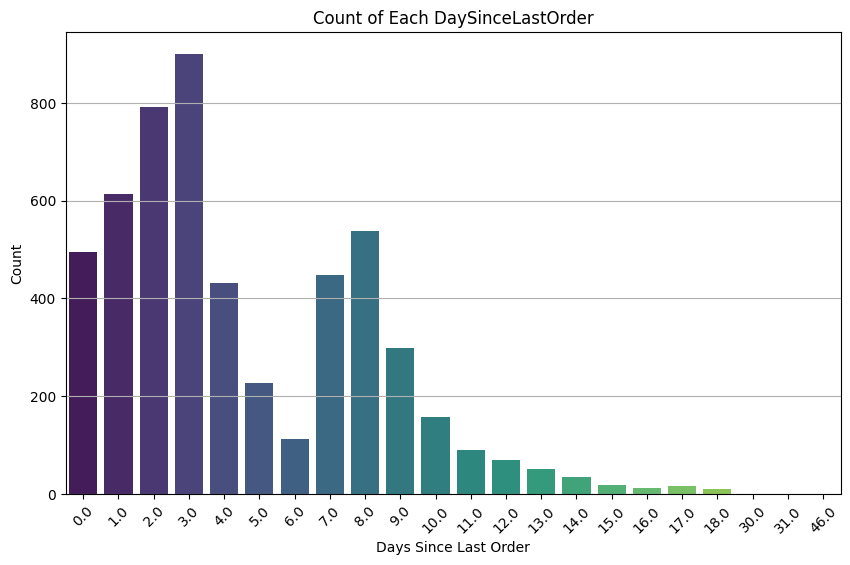

In [137]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # DaySinceLastOrder의 고유 값과 개수 계산
# day_since_last_order_counts = df_['DaySinceLastOrder'].value_counts()

# # 시각화
# print(day_since_last_order_counts)
# plt.figure(figsize=(10, 6))
# sns.barplot(x=day_since_last_order_counts.index, y=day_since_last_order_counts.values, palette='viridis')
# plt.title('Count of Each DaySinceLastOrder')
# plt.xlabel('Days Since Last Order')
# plt.ylabel('Count')
# plt.xticks(rotation=45)  # x축 레이블 회전
# plt.grid(axis='y')
# plt.show()


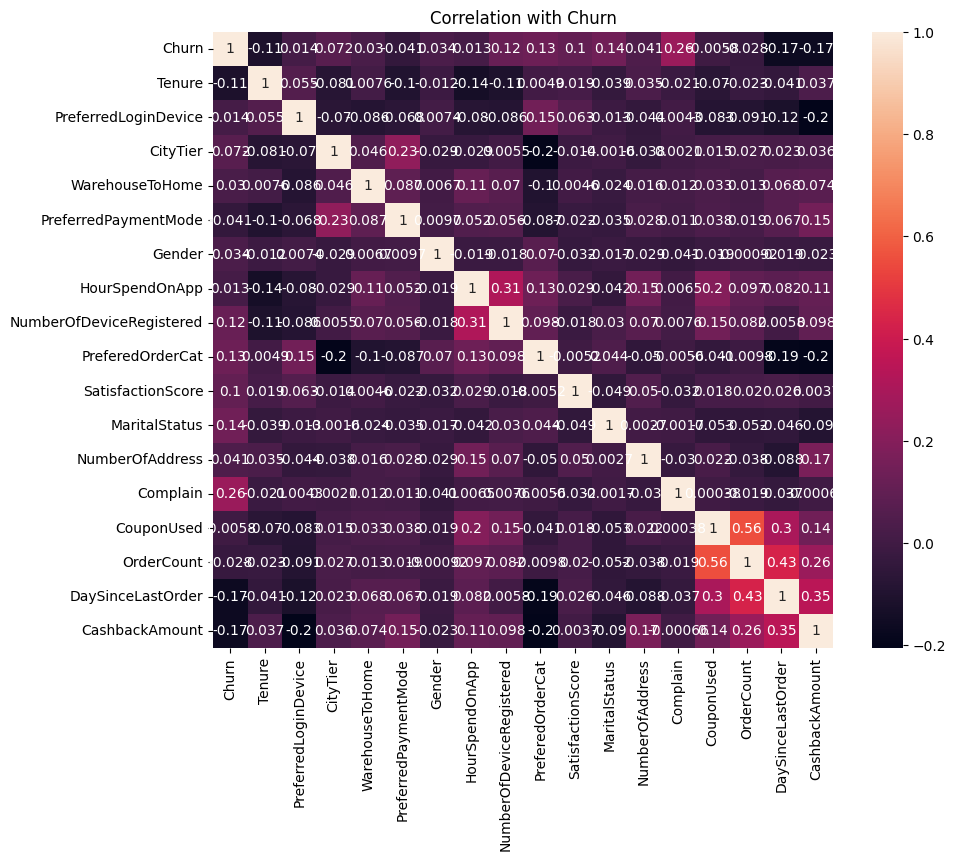

In [165]:
# 상관관계 계산
correlation_matrix = df.corr()

# Churn과의 상관관계 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,)
plt.title('Correlation with Churn')
plt.show()


In [166]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,1,1.479106,-0.983967,4,0,0.113893,-0.678414,2,-0.777578,2,1.840180,1.575910,-0.353570,-0.633891,0.107397,-0.345321
1,1,67.0,2,-0.710481,-0.762603,6,1,0.113893,0.300830,3,-0.052802,2,1.065794,1.575910,-0.901393,-0.633891,-1.289536,-1.133221
2,1,67.0,2,-0.710481,1.672403,4,1,-1.269482,0.300830,3,-0.052802,2,0.678601,1.575910,-0.901393,-0.633891,-0.451376,-1.145737
3,1,0.0,2,1.479106,0.012172,4,1,-1.269482,0.300830,2,1.396749,2,1.452987,-0.634554,-0.901393,-0.633891,-0.451376,-0.867358
5,1,0.0,0,-0.710481,0.786946,4,0,0.113893,1.280074,4,1.396749,2,-0.870172,1.575910,1.289898,1.118270,0.666170,-0.764000


In [272]:
from sklearn.model_selection import train_test_split
# df의 Churn 값을 y로 X 는 나머지
X = df.drop('Churn', axis=1)
y = df['Churn']

# 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 각각의 데이터 수
print("x_train shape:", x_train.shape)
print("x_val shape:", x_val.shape)
print("x_test shape:", X_test.shape)

x_train shape: (3241, 18)
x_val shape: (811, 18)
x_test shape: (1013, 18)


In [273]:
from imblearn.over_sampling import RandomOverSampler

rds = RandomOverSampler(random_state=42)
x_train_resample, y_train_resample = rds.fit_resample(x_train,y_train)
print(f'shape : {x_train.shape}, {x_train_resample.shape}')

shape : (3241, 18), (5418, 18)


In [274]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Decision Tree 모델 초기화
model = DecisionTreeClassifier(random_state=42)

# 모델 학습
model.fit(x_train_resample, y_train_resample)

# 검증 데이터로 예측
y_val_pred = model.predict(x_val)

# 테스트 데이터로 예측
y_test_pred = model.predict(X_test)

# 검증 데이터 평가 지표
print("Classification val Report:")
print(classification_report(y_val, y_val_pred))

# 테스트 평가 지표
# print("Classification test Report:")
# print(classification_report(y_test, y_test_pred))

Classification val Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       673
           1       0.76      0.78      0.77       138

    accuracy                           0.92       811
   macro avg       0.86      0.86      0.86       811
weighted avg       0.92      0.92      0.92       811



In [278]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Decision Tree 모델 초기화
model = DecisionTreeClassifier(random_state=42)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': [None, 'balanced']
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(x_train_resample, y_train_resample)

# 최적의 하이퍼파라미터 출력
print("Best parameters:", grid_search.best_params_)

# 최적의 모델로 검증 데이터 예측
y_val_pred = grid_search.best_estimator_.predict(x_val)

# 검증 데이터 평가 지표
print("\nValidation Set Classification Report:")
print(classification_report(y_val, y_val_pred))

Best parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       673
           1       0.83      0.77      0.80       138

    accuracy                           0.93       811
   macro avg       0.89      0.87      0.88       811
weighted avg       0.93      0.93      0.93       811



In [270]:
#GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Gradient Boosting Classifier 모델 초기화
model = GradientBoostingClassifier(random_state=42)

# 모델 학습
model.fit(x_train_resample, y_train_resample)

# 검증 데이터로 예측
y_val_pred = model.predict(x_val)

# 검증 데이터 평가 지표
print(classification_report(y_val, y_val_pred))

# 테스트 데이터로 예측
y_test_pred = model.predict(X_test)

# 테스트 평가 지표
# print("\nTest Set Classification Report:")
# print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       793
           1       0.64      0.80      0.71       157

    accuracy                           0.89       950
   macro avg       0.80      0.85      0.82       950
weighted avg       0.91      0.89      0.90       950



In [271]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Gradient Boosting Classifier 모델 초기화
model = GradientBoostingClassifier(random_state=42)

# 수정된 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 150],  # 트리 개수 범위 축소
    'learning_rate': [0.05, 0.1],  # learning_rate 범위 축소
    'max_depth': [3, 4],  # 최대 깊이 범위 축소
    'min_samples_split': [5, 10],  # 최소 샘플 수 범위 축소
    'min_samples_leaf': [2, 4],  # 리프 노드 최소 샘플 수 범위 축소
    'subsample': [0.8, 1.0],  # 서브샘플링 비율 범위 축소
    'max_features': ['sqrt', 'log2']  # 특성 선택 방법 축소
}

# 그리드 서치 객체 생성 (교차 검증 횟수 감소)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(x_train_resample, y_train_resample)

# 최적의 하이퍼파라미터 출력
print("Best parameters:", grid_search.best_params_)

# 최적의 모델로 검증 데이터 예측
y_val_pred = grid_search.best_estimator_.predict(x_val)

# 검증 데이터 평가 지표
print("\nValidation Set Classification Report:")
print(classification_report(y_val, y_val_pred))

Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150, 'subsample': 1.0}

Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       793
           1       0.72      0.78      0.75       157

    accuracy                           0.91       950
   macro avg       0.84      0.86      0.85       950
weighted avg       0.92      0.91      0.92       950



In [277]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


# AdaBoost 모델 초기화
model = AdaBoostClassifier(random_state=42)

# 모델 학습
model.fit(x_train_resample, y_train_resample)

# 검증 데이터로 예측
y_val_pred = model.predict(x_val)

# 테스트 데이터로 예측
y_test_pred = model.predict(X_test)

# 검증 데이터 평가 지표
print("Classification val Report:")
print(classification_report(y_val, y_val_pred))

# 테스트 평가 지표
# print("Classification test Report:")
# print(classification_report(y_test, y_test_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Classification val Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       673
           1       0.55      0.88      0.68       138

    accuracy                           0.86       811
   macro avg       0.76      0.87      0.79       811
weighted avg       0.90      0.86      0.87       811



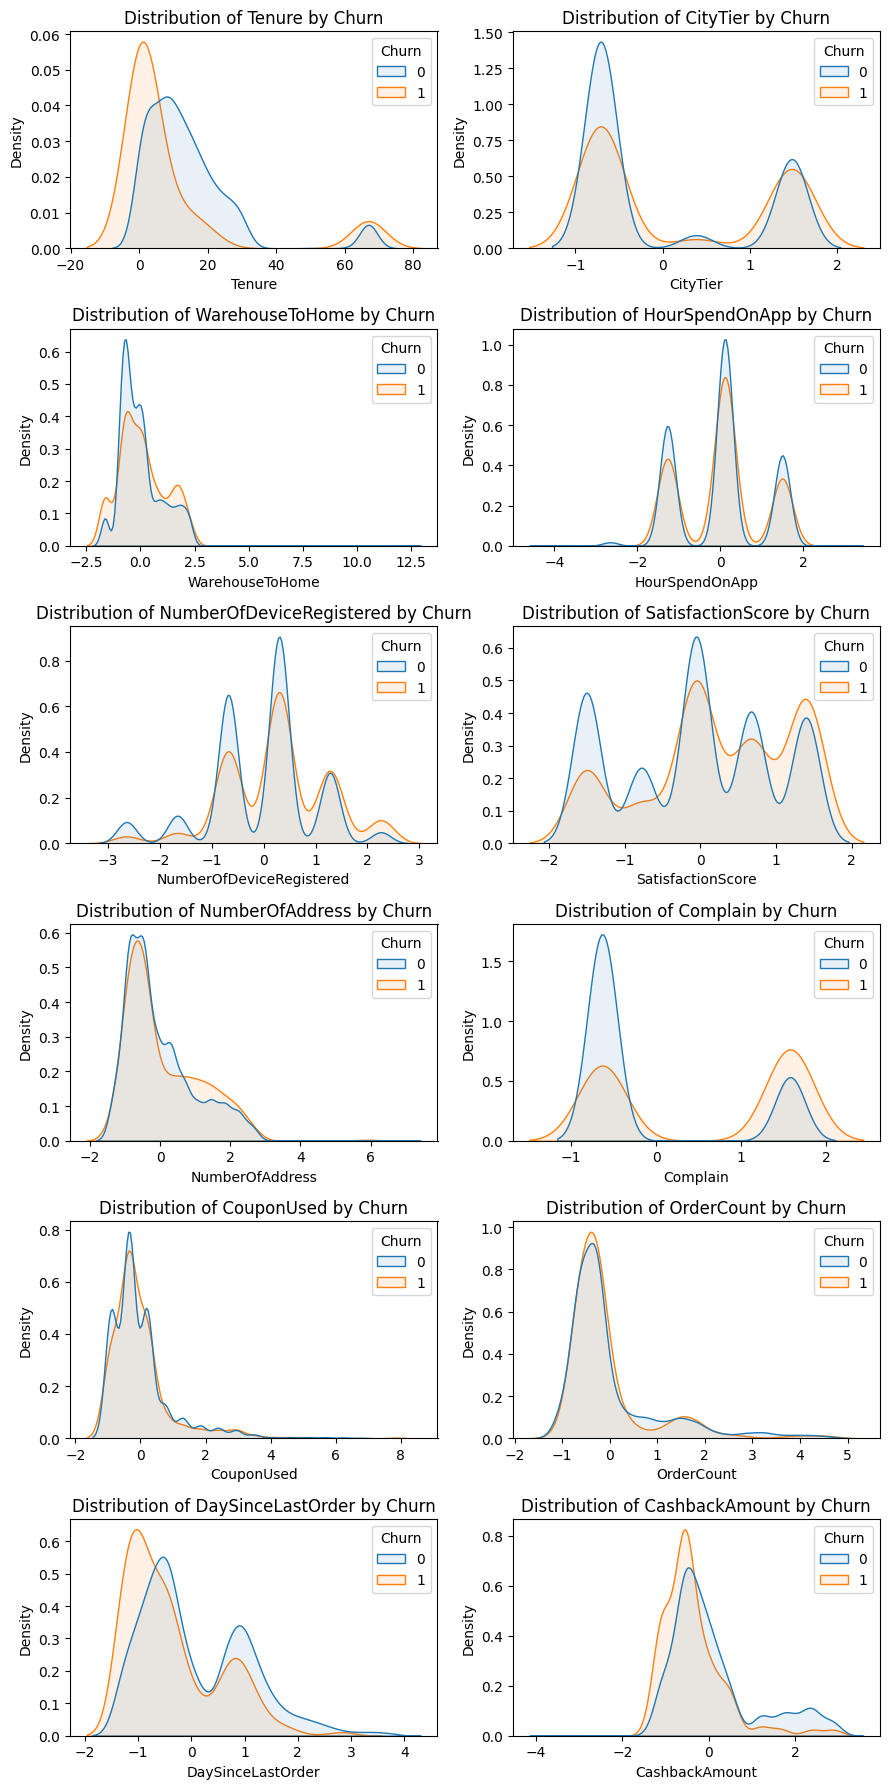

In [239]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 밀도 그래프 그리기
plt.figure(figsize=(9, 18))
num_col.remove('Churn')

for i, column in enumerate(num_col):
    plt.subplot(len(num_col) // 2 + len(num_col) % 2, 2, i + 1)  # 행 수를 2로 설정
    sns.kdeplot(data=df, x=column, hue='Churn', fill=True, common_norm=False, alpha=0.1)
    plt.title(f'Distribution of {column} by Churn')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()